# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

In [2]:
ds1 = "3d_classification_data_v2.csv"
ex1_ds = np.loadtxt(ds1, delimiter=',')

x1 = ex1_ds[:, 0:-1] #first 2 col
y1 = ex1_ds[:,-1]
y1.shape = (len(y1),1)

# x_1.T keeps failing over and over again
# because w_1 is a 3x1 matrix, a new x_1 needs to be... Mx3 ??
wT_1 = np.hstack((np.ones((x1.shape[0],y1.shape[1])),x1))

In [5]:
#######################################
# mostly copied from HW1
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)

def gradient_descent(g, alpha, max_its, w, x, y, a):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    #best_w = w             # weight we return, should be the one providing lowest evaluation
    best_eval = g(w, x, y)       # lowest evaluation yet
    best_eval_hist = []

    best_acc = a(w, x, y)
    best_acc_hist = []
    # broke up the following:
    #entire_history = []
    
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w, x, y)

        # take gradient descent step
        w = w - alpha*grad_eval
        #entire_history.append(w)
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w, x, y)
        best_eval_hist.append(test_eval)
        
        test_acc = a(w, x, y)
        best_acc_hist.append(test_acc)
        #if test_eval < best_eval:
            #best_eval = test_eval
            #best_w = w
            
    return best_eval_hist, best_acc_hist
    #return entire_history

#######################################
# book equation 4.9
def softmax(w, x, y):
    b = w[0]
    yp = b + np.dot(x, w) #remember to use wT_1 in place of x
    return np.sum(np.log(1 + np.exp(-y * yp)))

#     for p in range(0, len(y1)):
#         b = w[0]
#         yp = b = np.dot(wT1, w[1:])

# soft_cost_eval = []

#     for p in range(0,len(y1)):
#         cost = cost + np.sum(np.log(1+
#         exp = -y1[p] * np.dot(x1[p].T, w[1:]) #w[1:
#         cost = cost + np.sum(np.log(1 + exp))
#     return cost

#######################################
# book equations 4.26 & 4.28
def counting_v3(w, x, y):
    b = w[0]
    yp = b + np.dot(x, w) #remember to use wT_1 in place of x
    P = y.shape[0]
    return 1 - (np.sum(np.maximum(0, (np.sign(-y * yp)))))/P

#######################################

# def counting(acc):
#     P = y.shape[0]
#     return [(1 - acc)*P]
# mis_count_eval = []    

# def counting_v2(w):
#     b = w[0]
#     yp = b + np.dot(wT_1, w)
#     return (np.sign(yp)-y)**2

#     for p in range(0,len(y1)):
#         part = np.dot(x1[p].T, w[1:])
#         count = count + (np.sign(part) - y1[p])**2
#         count = count + (np.sign(w[:] + np.dot(x[p].T,w[1]))-y[p])
#         count = count + (np.sign(np.dot(x1[p].T,w[1]))-y1[p])
#     return count

#######################################
def misclassification(a, y):
    return [(1 - a)*y.shape[0] for a in a]
                   #y.shape[0] = P & learned a in a


In [26]:
w1 = np.random.randn(len(x1.T)+1,1) #random 3

# can chaange alpha/max_its, but not sure what the problem wants specifically
e1, a1 = gradient_descent(g=softmax,
                          alpha=10**-2,
                          max_its=4000,
                          w=w1,
                          x=wT_1,
                          y=y1,
                          a=counting_v3)

#     soft_cost_eval.append(softmax(w_history[v]))
#     mis_count_eval.append(counting_v2(w_history[v]))

m1 = misclassification(a=a1, y=y1)
m1[-1] #this means there were about 8 misclassifications

7.9999999999999964

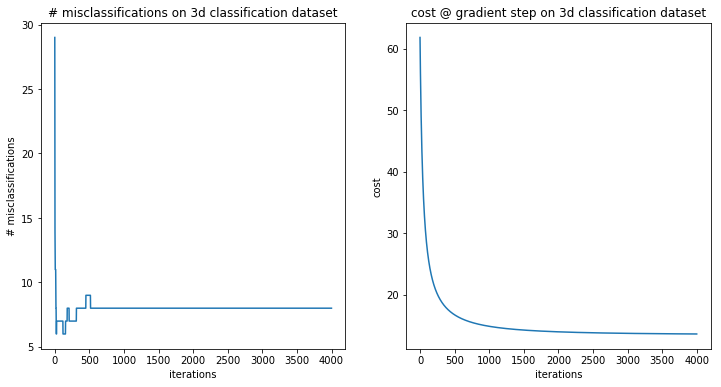

In [28]:
# create plots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m1)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on 3d classification dataset')

ax2.plot(e1)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on 3d classification dataset')
plt.show()

# Note: not sure why it's not showing up..

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [29]:
ds2 = "breast_cancer_data.csv"
ex2_ds = np.loadtxt(ds2, delimiter=',')

x2 = ex2_ds[:, 0:-1] #first 2 col
y2 = ex2_ds[:,-1]
y2.shape = (len(y2),1)

# x2.T keeps failing over and over again
# because w2 is a 3x1 matrix, a new x2 needs to be... Mx3 ??
wT_2 = np.hstack((np.ones((x2.shape[0],y2.shape[1])),x2))

In [40]:
w2 = np.random.randn(len(x2.T)+1,1) #random 3

e2, a2 = gradient_descent(g=softmax,
                          alpha=10**-4,
                          max_its=4000,
                          w=w2,
                          x=wT_2,
                          y=y2,
                          a=counting_v3)

#     soft_cost_eval.append(softmax(w_history[v]))
#     mis_count_eval.append(counting_v2(w_history[v]))

m2 = misclassification(a=a2, y=y2)
m2[-1]

27.000000000000004

# Please note! I did reach less than 30 examples through misclassification! I reached 27.

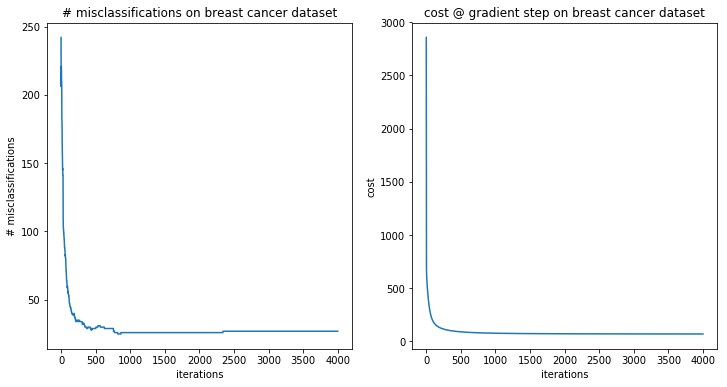

In [41]:
# create plots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m2)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on breast cancer dataset')

ax2.plot(e2)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on breast cancer dataset')
plt.show()

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [42]:
ex3_ds = np.loadtxt("3class_data.csv", delimiter=',')

x3 = ex3_ds[:, 0:-1] #first 2 col
y3 = ex3_ds[:,-1]
y3.shape = (len(y3),1)

############# what do I do here?

# where true (asked Lukas)
y31 = np.where(y3==1, 1, -1)
y32 = np.where(y3==2, 1, -1)
y33 = np.where(y3==3, 1, -1)

#############

# x3.T keeps failing over and over again
# because w3 is a 3x1 matrix, a new x3 needs to be... Mx3 ??
wT_3 = np.hstack((np.ones((x3.shape[0],y3.shape[1])),x3))

In [43]:
w31 = np.random.randn(len(x3.T)+1,1) #random 3
e31, a31 = gradient_descent(g=softmax,
                            alpha=10**-3,
                            max_its=4000,
                            w=w31,
                            x=wT_3,
                            y=y31,
                            a=counting_v3)
m31 = misclassification(a=a31, y=y31)

w32 = np.random.randn(len(x3.T)+1,1) #random 3
e32, a32 = gradient_descent(g=softmax,
                            alpha=10**-3,
                            max_its=4000,
                            w=w32,
                            x=wT_3,
                            y=y32,
                            a=counting_v3)
m32 = misclassification(a=a32, y=y32)

w33 = np.random.randn(len(x3.T)+1,1) #random 3
e33, a33 = gradient_descent(g=softmax,
                            alpha=10**-3,
                            max_its=4000,
                            w=w33,
                            x=wT_3,
                            y=y33,
                            a=counting_v3)
m33 = misclassification(a=a33, y=y33)

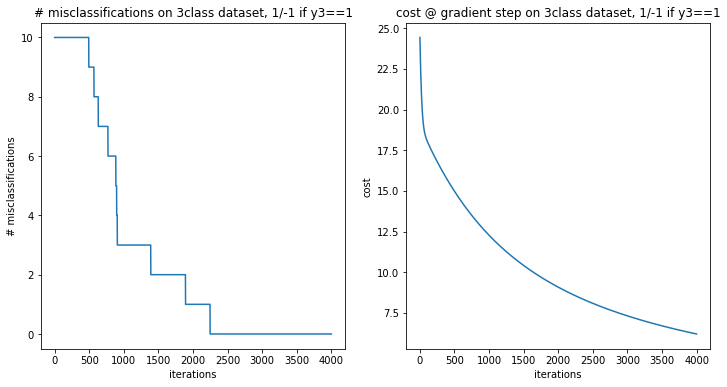

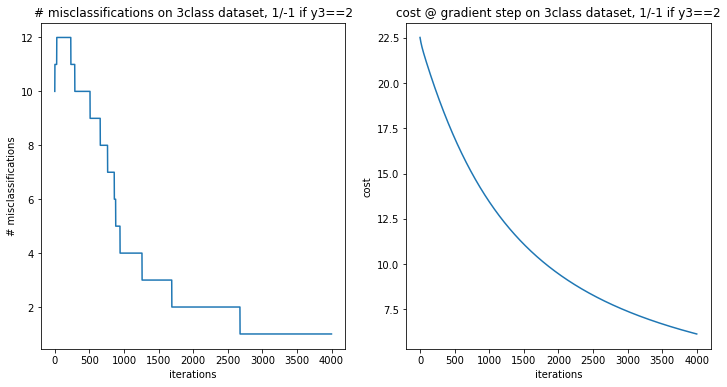

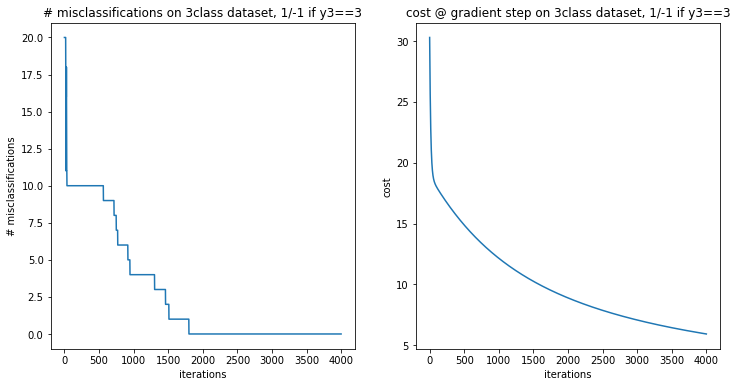

In [44]:
# create plots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m31)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on 3class dataset, 1/-1 if y3==1')

ax2.plot(e31)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on 3class dataset, 1/-1 if y3==1')
plt.show()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m32)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on 3class dataset, 1/-1 if y3==2')

ax2.plot(e32)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on 3class dataset, 1/-1 if y3==2')
plt.show()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m33)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on 3class dataset, 1/-1 if y3==3')

ax2.plot(e33)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on 3class dataset, 1/-1 if y3==3')
plt.show()


# Please note! I tried to implement a scatterplot to better visualize linear separation, but it didn't work...

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [60]:
ds4 = "bricks.csv"
ex4_ds = np.loadtxt(ds4, delimiter=',')

x4 = ex4_ds[:, 0:-1] #first 2 col
y4 = ex4_ds[:,-1]
y4.shape = (len(y4),1)

############# what do I do here?
# imagine columns of x, and multiply x1 as x1^2, x1^3 and x2 as x2^2 x2^3
# asked keith
#############

x4_K = np.hstack((x4,
                  np.power(x4,2),
                  np.power(x4,3),
                  np.power(x4,4),
                  np.power(x4,5),
                  np.power(x4,6),
                  np.power(x4,7),
                  np.power(x4,8)))
wT_4 = np.hstack((np.ones((x4.shape[0],y4.shape[1])),x4_K))

In [61]:
w4 = np.random.randn(len(x4_K.T)+1,1) #random 3
e4, a4 = gradient_descent(g=softmax,
                            alpha=10**-3,
                            max_its=5000,
                            w=w4,
                            x=wT_4,
                            y=y4,
                            a=counting_v3)
m4 = misclassification(a=a4, y=y4)
m4[-1]
# m4 betweeen 2-4

3.0000000000000027

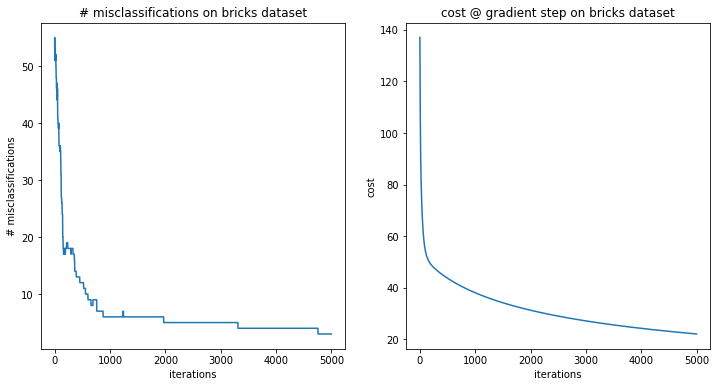

In [62]:
# create plots
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(m4)
ax1.set_xlabel('iterations')
ax1.set_ylabel('# misclassifications')
ax1.set_title('# misclassifications on bricks dataset')

ax2.plot(e4)
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_title('cost @ gradient step on bricks dataset')
plt.show()